In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar os dados
df = pd.read_csv('../data/weaving_rejection_dataset_updated.csv')

In [3]:
# Ver as primeiras linhas do dataset
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length.yds.,Shrink_allow,Req_grey_fabric,Req_beam_length.yds.,Total_Pdn.yds.,Rejection,warp_count,weft_count,epi,ppi
0,31300,6.0,38286.9360,12.5,33297.872340,34797.651103,27646.0,285,80,80,110,80
1,10450,7.0,13057.5840,14.5,11236.559140,12017.350432,11019.0,39,40,40,110,90
2,900,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,0,40,40,110,80
3,8000,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,58,40,40,130,80
4,3500,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,1043,50,50,140,70


In [4]:
# Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22010 entries, 0 to 22009
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Req_Finish_Fabrics    22010 non-null  int64  
 1   Fabric_Allowance      22010 non-null  float64
 2   Rec_Beam_length.yds.  22010 non-null  float64
 3   Shrink_allow          22010 non-null  float64
 4   Req_grey_fabric       22010 non-null  float64
 5   Req_beam_length.yds.  22010 non-null  float64
 6   Total_Pdn.yds.        22010 non-null  float64
 7   Rejection             22010 non-null  int64  
 8   warp_count            22010 non-null  int64  
 9   weft_count            22010 non-null  int64  
 10  epi                   22010 non-null  int64  
 11  ppi                   22010 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [5]:
# Verificar a existência de valores nulos
df.isnull().sum()

Req_Finish_Fabrics      0
Fabric_Allowance        0
Rec_Beam_length.yds.    0
Shrink_allow            0
Req_grey_fabric         0
Req_beam_length.yds.    0
Total_Pdn.yds.          0
Rejection               0
warp_count              0
weft_count              0
epi                     0
ppi                     0
dtype: int64

In [6]:
# Verificar a contagem de valores únicos nas colunas categóricas
df.select_dtypes(include='object').nunique()

Series([], dtype: float64)

In [7]:
# Função summary com os parâmetros solicitados
summary = df.describe().T

# Adicionar a mediana
summary['median'] = df.median()

# Renomear colunas para manter os parâmetros consistentes
summary = summary.rename(columns={
    'count': 'count',
    'mean': 'mean',
    'std': 'sd',       # Desvio padrão (Standard Deviation)
    'min': 'min',
    '25%': 'Q1',       # Primeiro quartil
    '50%': 'median',   # Mediana
    '75%': 'Q3',       # Terceiro quartil
    'max': 'max'
})

# Exibir o resumo
print(summary)

                        count          mean            sd        min  \
Req_Finish_Fabrics    22010.0   9843.822308  21768.747242  50.000000   
Fabric_Allowance      22010.0      9.089901      3.638308   5.000000   
Rec_Beam_length.yds.  22010.0   8880.315263  23447.095997  43.744000   
Shrink_allow          22010.0     13.375289      2.979386   6.000000   
Req_grey_fabric       22010.0  10628.742383  23466.551812  54.347826   
Req_beam_length.yds.  22010.0  11115.469638  24555.159025  56.473019   
Total_Pdn.yds.        22010.0   6181.516686  18045.242259   0.000000   
Rejection             22010.0     55.942254    167.090065   0.000000   
warp_count            22010.0     42.886415     14.645191  20.000000   
weft_count            22010.0     41.333485      7.550584  20.000000   
epi                   22010.0    120.117992     15.284722  30.000000   
ppi                   22010.0     81.931622      9.370112  42.000000   

                               Q1       median           Q3    

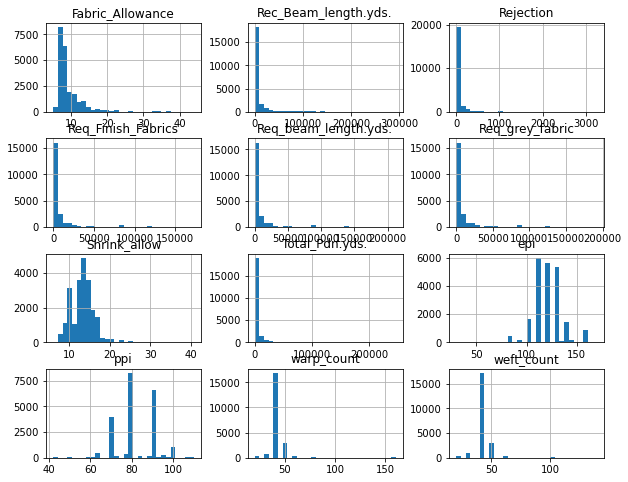

In [8]:
# Plotar histogramas para as variáveis numéricas
df.hist(figsize=(10, 8), bins=30)
plt.show()

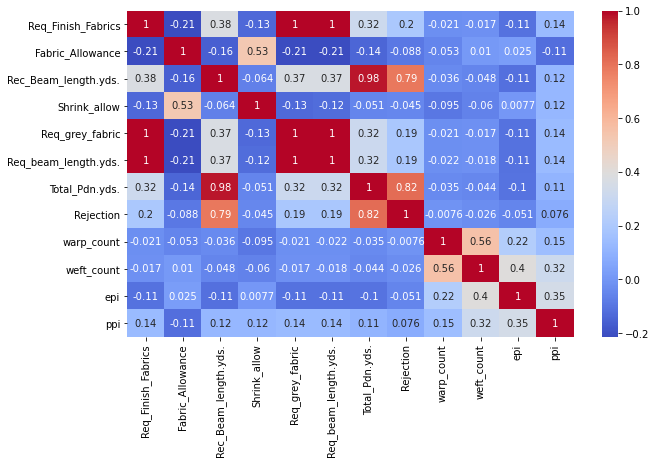

In [9]:
# Mapa de calor das correlações
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

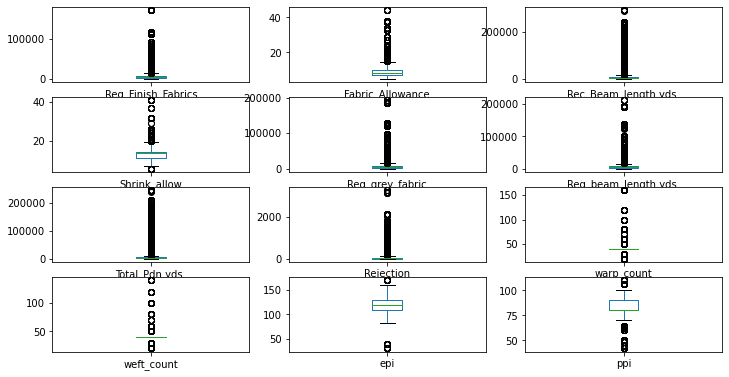

In [10]:
# Verificar o número de colunas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plotar os boxplots ajustando o layout
df[num_cols].plot(kind='box', subplots=True, layout=(len(num_cols) // 3 + 1, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.show()
